### Precursor imports

In [1]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # Silence RDKit warnings

### Initialize data

In [2]:
import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Sample ID', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Sample ID,max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,L10,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,L11,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,L12,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,L2,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,L3,9.021096
...,...,...,...,...,...
499,"4,5-dichloro-o-phenylenediamine",Nc1cc(Cl)c(Cl)cc1N,0.700,L53,0.157703
500,"N,N'-diphenyl-p-phenylenediamine",N(c1ccccc1)c2ccc(Nc3ccccc3)cc2,0.700,L54,0.011934
501,3-mercaptopropionic acid,OC(=O)CCS,0.700,L55,11.290852
502,"3,3,3 triphenyl propionic acid",OC(=O)CC(c1ccccc1)(c2ccccc2)c3ccccc3,0.700,L56,0.218561


In [3]:
from rdkit import Chem
smiles = df['SMILES'].unique().tolist()
mols = [Chem.MolFromSmiles(s) for s in smiles]
mol_names = df['Ligand Name'].unique().tolist()
mol_dict = {mol_names[i]: smiles[i] for i in range(len(smiles))}
print(f'Number of unique ligands: {len(smiles)}')

Number of unique ligands: 56


In [9]:
df[['Ligand Name', 'SMILES']].drop_duplicates().reset_index(drop=True)[18:36]


,Ligand Name,SMILES
18,4 methoxy phenol,COc1ccc(O)cc1
19,4-fluoro-2-nitrophenol,Oc1ccc(F)cc1[N+]([O-])=O
20,2-amino-4-(trifluoromethyl)benzenethiolhydroch...,[H+].[Cl-].Nc1cc(ccc1S)C(F)(F)F
21,triphenylmethane thiol,SC(c1ccccc1)(c2ccccc2)c3ccccc3
22,aniline,Nc1ccccc1
23,2 amino benzethiol,Nc1ccccc1S
24,o-phenylene diamine,Nc1ccccc1N
25,2-bromoethylamine hydrobromide,[H+].[Br-].NCCBr
26,3 methoxypropylamine,COCCCN
27,ethanolamine,NCCO


### Display all ligands from smiles

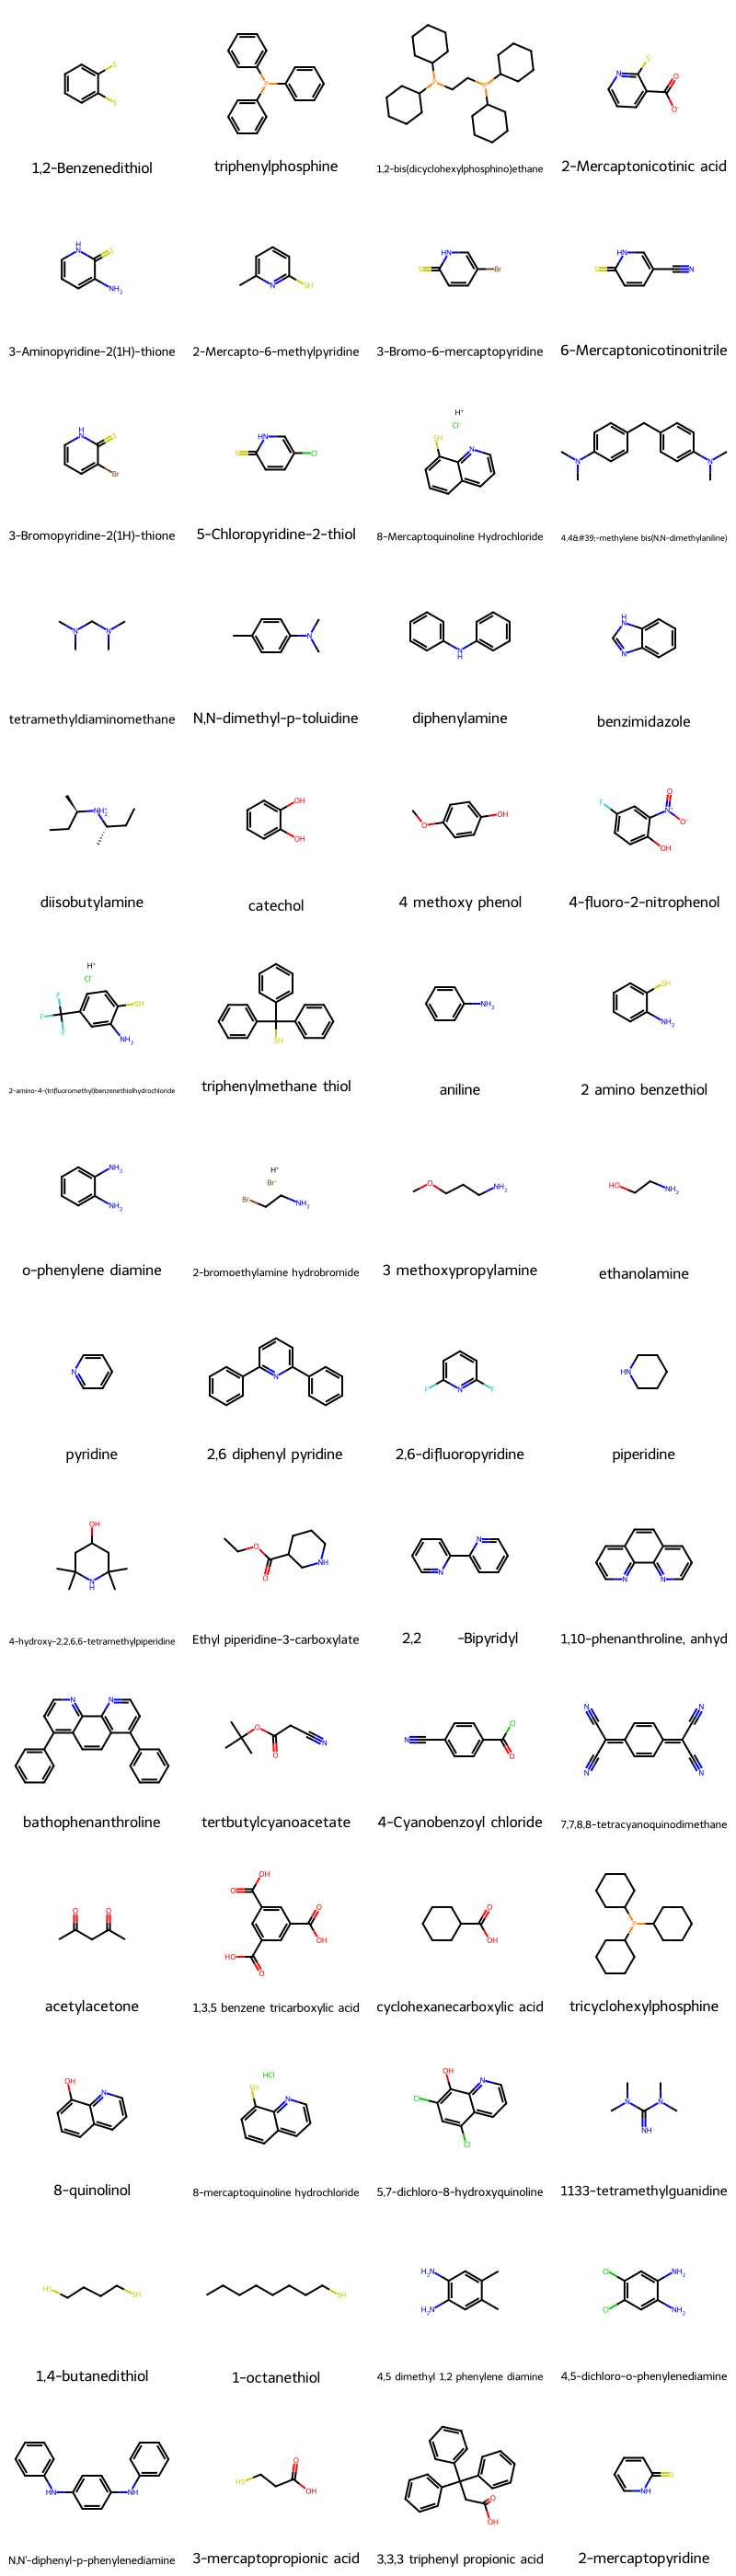

In [4]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols, molsPerRow=4, maxMols=len(smiles), legends=mol_names)

### Fingerprinting

In [5]:
from utils.utils import generate_fingerprints, print_fp_stats

fp_results = []
for i in range(len(mols)):
    fp = generate_fingerprints(mols[i])
    fp_results.append(fp)
    print_fp_stats(fp_results[i], mol_names[i])

1,2-Benzenedithiol Fingerprint Analysis:
Morgan      :  10/2048 bits on (0.5% density)
MACCS       :  10/167 bits on (6.0% density)
Topological :  57/2048 bits on (2.8% density)
AtomPair    :  25/2048 bits on (1.2% density)

triphenylphosphine Fingerprint Analysis:
Morgan      :  12/2048 bits on (0.6% density)
MACCS       :   7/167 bits on (4.2% density)
Topological : 119/2048 bits on (5.8% density)
AtomPair    :  58/2048 bits on (2.8% density)

1,2-bis(dicyclohexylphosphino)ethane Fingerprint Analysis:
Morgan      :  15/2048 bits on (0.7% density)
MACCS       :  12/167 bits on (7.2% density)
Topological : 158/2048 bits on (7.7% density)
AtomPair    : 110/2048 bits on (5.4% density)

2-Mercaptonicotinic acid Fingerprint Analysis:
Morgan      :  24/2048 bits on (1.2% density)
MACCS       :  23/167 bits on (13.8% density)
Topological : 296/2048 bits on (14.5% density)
AtomPair    :  43/2048 bits on (2.1% density)

3-Aminopyridine-2(1H)-thione Fingerprint Analysis:
Morgan      :  19/2048 

### Molecular Similarity Calculations

In [6]:
from utils.utils import calculate_similarity_matrix, visualize_similarity_interactive

sm = ['Tanimoto', 'Dice']
ft = ['Morgan', 'Topological', 'MACCS', 'AtomPair']

tanimoto_matrix = calculate_similarity_matrix(mol_dict, fp_type=ft[0], similarity_metric=sm[0])
dice_matrix = calculate_similarity_matrix(mol_dict, fp_type=ft[0], similarity_metric=sm[1])
mol_id = [i for i in range(len(mol_names))]

visualize_similarity_interactive(tanimoto_matrix, mol_names, 'jet', ft[0], sm[0])


Most similar pair: diphenylamine & N,N'-diphenyl-p-phenylenediamine (Similarity: 0.923)


In [7]:
print(f'Most similar pair: {mol_names[14]} & {mol_names[52]}')

Most similar pair: diphenylamine & N,N'-diphenyl-p-phenylenediamine


In [8]:
visualize_similarity_interactive(dice_matrix, mol_names, 'jet', ft[0], sm[1])


Most similar pair: diphenylamine & N,N'-diphenyl-p-phenylenediamine (Similarity: 0.960)


### Molecular Descriptors

In [9]:
from utils.utils import calculate_descriptors_custom

# Calculate descriptors for our drug dataset
descriptor_data = []
for name, smiles in mol_dict.items():
    mol = Chem.MolFromSmiles(smiles)
    desc = calculate_descriptors_custom(mol, name)
    descriptor_data.append(desc)

# Create DataFrame
df_desc = pd.DataFrame(descriptor_data)

print("Molecular Descriptors for Ligand Dataset:")
print("=" * 45)
df_desc.round(2).head(10)

Molecular Descriptors for Ligand Dataset:


,Name,MW,HeavyAtoms,NumBonds,NumRings,NumAromaticRings,LogP,HBD,HBA,TPSA,BertzCT,Chi0v,Kappa1,NumRotatableBonds,FractionCsp3
0,"1,2-Benzenedithiol",140.23,8,8,1,1,1.50,0,2,0.00,162.64,5.76,5.79,0,0.00
1,triphenylphosphine,262.29,19,21,3,3,3.44,0,0,0.00,523.71,11.50,12.14,3,0.00
2,"1,2-bis(dicyclohexylphosphino)ethane",422.62,28,31,4,0,9.28,0,0,0.00,336.15,20.55,22.07,7,1.00
3,2-Mercaptonicotinic acid,153.16,10,10,1,1,-0.65,0,4,53.02,261.68,5.72,6.95,1,0.00
4,3-Aminopyridine-2(1H)-thione,126.18,8,8,1,1,1.33,2,2,41.81,227.87,5.03,5.31,0,0.00
5,2-Mercapto-6-methylpyridine,125.20,8,8,1,1,1.68,1,2,12.89,168.39,5.52,5.63,0,0.17
6,3-Bromo-6-mercaptopyridine,190.06,8,8,1,1,2.51,1,1,15.79,209.62,6.42,5.98,0,0.00
7,6-Mercaptonicotinonitrile,136.18,9,9,1,1,1.62,1,2,39.58,274.17,5.40,5.99,0,0.00
8,3-Bromopyridine-2(1H)-thione,190.06,8,8,1,1,2.51,1,1,15.79,229.87,6.42,5.98,0,0.00
9,5-Chloropyridine-2-thiol,145.61,8,8,1,1,2.40,1,1,15.79,209.62,5.59,5.79,0,0.00


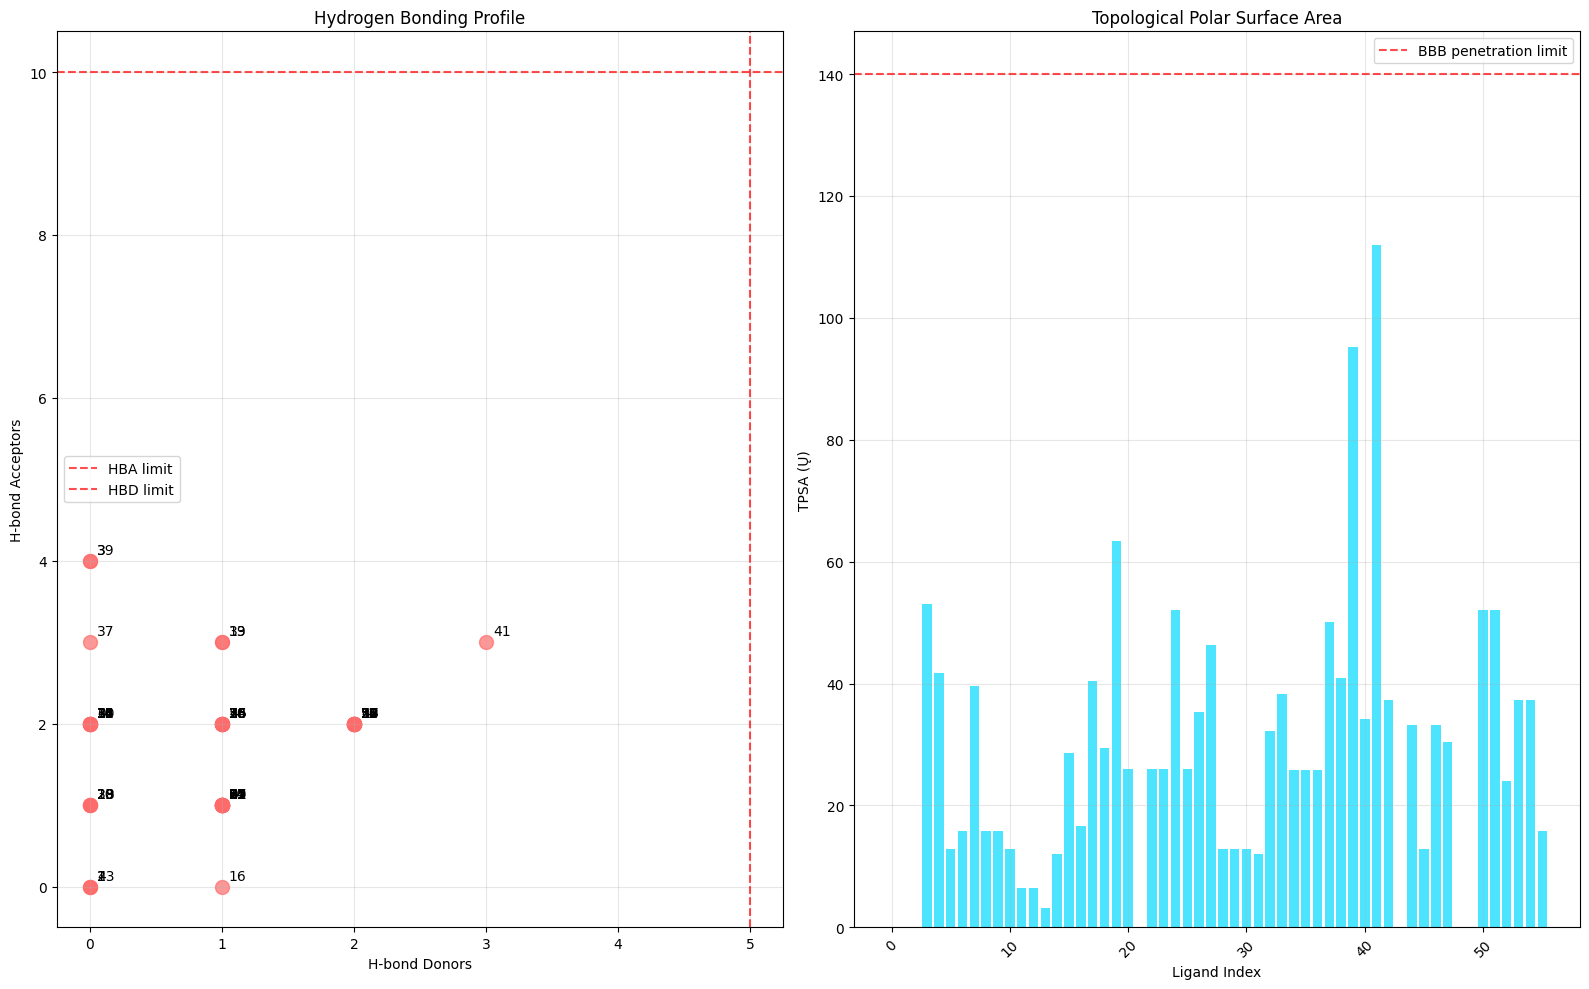

In [10]:
# Visualize descriptor relationships
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# H-bond donors vs acceptors
axes[0].scatter(df_desc['HBD'], df_desc['HBA'], s=100, alpha=0.7, color='#FF6B6B')
axes[0].axhline(y=10, color='red', linestyle='--', alpha=0.7, label='HBA limit')
axes[0].axvline(x=5, color='red', linestyle='--', alpha=0.7, label='HBD limit')
for i, name in enumerate(df_desc.index):
    axes[0].annotate(name, (df_desc['HBD'].iloc[i], df_desc['HBA'].iloc[i]), 
                  xytext=(5, 5), textcoords='offset points', fontsize=10)
axes[0].set_xlabel('H-bond Donors')
axes[0].set_ylabel('H-bond Acceptors')
axes[0].set_title('Hydrogen Bonding Profile')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# TPSA distribution
axes[1].bar(df_desc.index, df_desc['TPSA'], color='#00D9FF', alpha=0.7)
axes[1].axhline(y=140, color='red', linestyle='--', alpha=0.7, label='BBB penetration limit')
axes[1].set_ylabel('TPSA (Ų)')
axes[1].set_xlabel('Ligand Index')
axes[1].set_title('Topological Polar Surface Area')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Substructure Pattern Recognition

In [11]:
from utils.utils import analyze_substructures

# I totally used Gemini to come up with common patterns for HER ligands. 
# Thus, not validated.
her_ligand_patterns = {
    # --- Nitrogen Donors ---
    'Pyridine': 'c1ncccc1',
    'Bipyridine_2,2': 'n1ccccc1-c2ccccn2', # 2,2'-bipyridine scaffold
    'Amine Coordinator': '[Nv3;!$(N=O);!$(N-N);!$(N#*)]',  # Basic amine, not part of amide, nitro, etc.
    'Pendant Amine (proton relay)': 'N(CC)CC', # Common motif in DuBois-type catalysts

    # --- Phosphorus Donors ---
    'Phosphine': '[P&X3]',  # Trivalent phosphorus
    'Diphosphine (C2 bridge)': '[P]~[C]~[C]~[P]', # e.g., dppe-like backbone

    # --- Sulfur Donors ---
    'Thioether': '[S&X2]', # Divalent sulfur, e.g., R-S-R
    'Thiolate': '[S-;X1]', # Coordinated thiolate anion

    # --- Common Backbones ---
    'Benzene Scaffold': 'c1ccccc1',
    #'Aromatic Ring': 'a', # Any aromatic ring
    'Pincer-ready Phenyl': 'c1c(-*)c(-*)ccc1(-*)' # Phenyl ring substituted at 1,2,3 or 1,2,6 etc.
}

substructure_df = analyze_substructures(mol_dict, her_ligand_patterns)

print("Substructure Analysis:")
print("=" * 25)
substructure_df.head(10)

Substructure Analysis:


,Molecule,Pyridine,"Bipyridine_2,2",Amine Coordinator,Pendant Amine (proton relay),Phosphine,Diphosphine (C2 bridge),Thioether,Thiolate,Benzene Scaffold,Pincer-ready Phenyl
0,"1,2-Benzenedithiol",0,0,0,0,0,0,0,2,1,0
1,triphenylphosphine,0,0,0,0,1,0,0,0,3,0
2,"1,2-bis(dicyclohexylphosphino)ethane",0,0,0,0,2,1,0,0,0,0
3,2-Mercaptonicotinic acid,1,0,0,0,0,0,0,1,0,0
4,3-Aminopyridine-2(1H)-thione,1,0,1,0,0,0,0,0,0,0
5,2-Mercapto-6-methylpyridine,1,0,0,0,0,0,1,0,0,0
6,3-Bromo-6-mercaptopyridine,1,0,0,0,0,0,0,0,0,0
7,6-Mercaptonicotinonitrile,1,0,0,0,0,0,0,0,0,0
8,3-Bromopyridine-2(1H)-thione,1,0,0,0,0,0,0,0,0,0
9,5-Chloropyridine-2-thiol,1,0,0,0,0,0,0,0,0,0


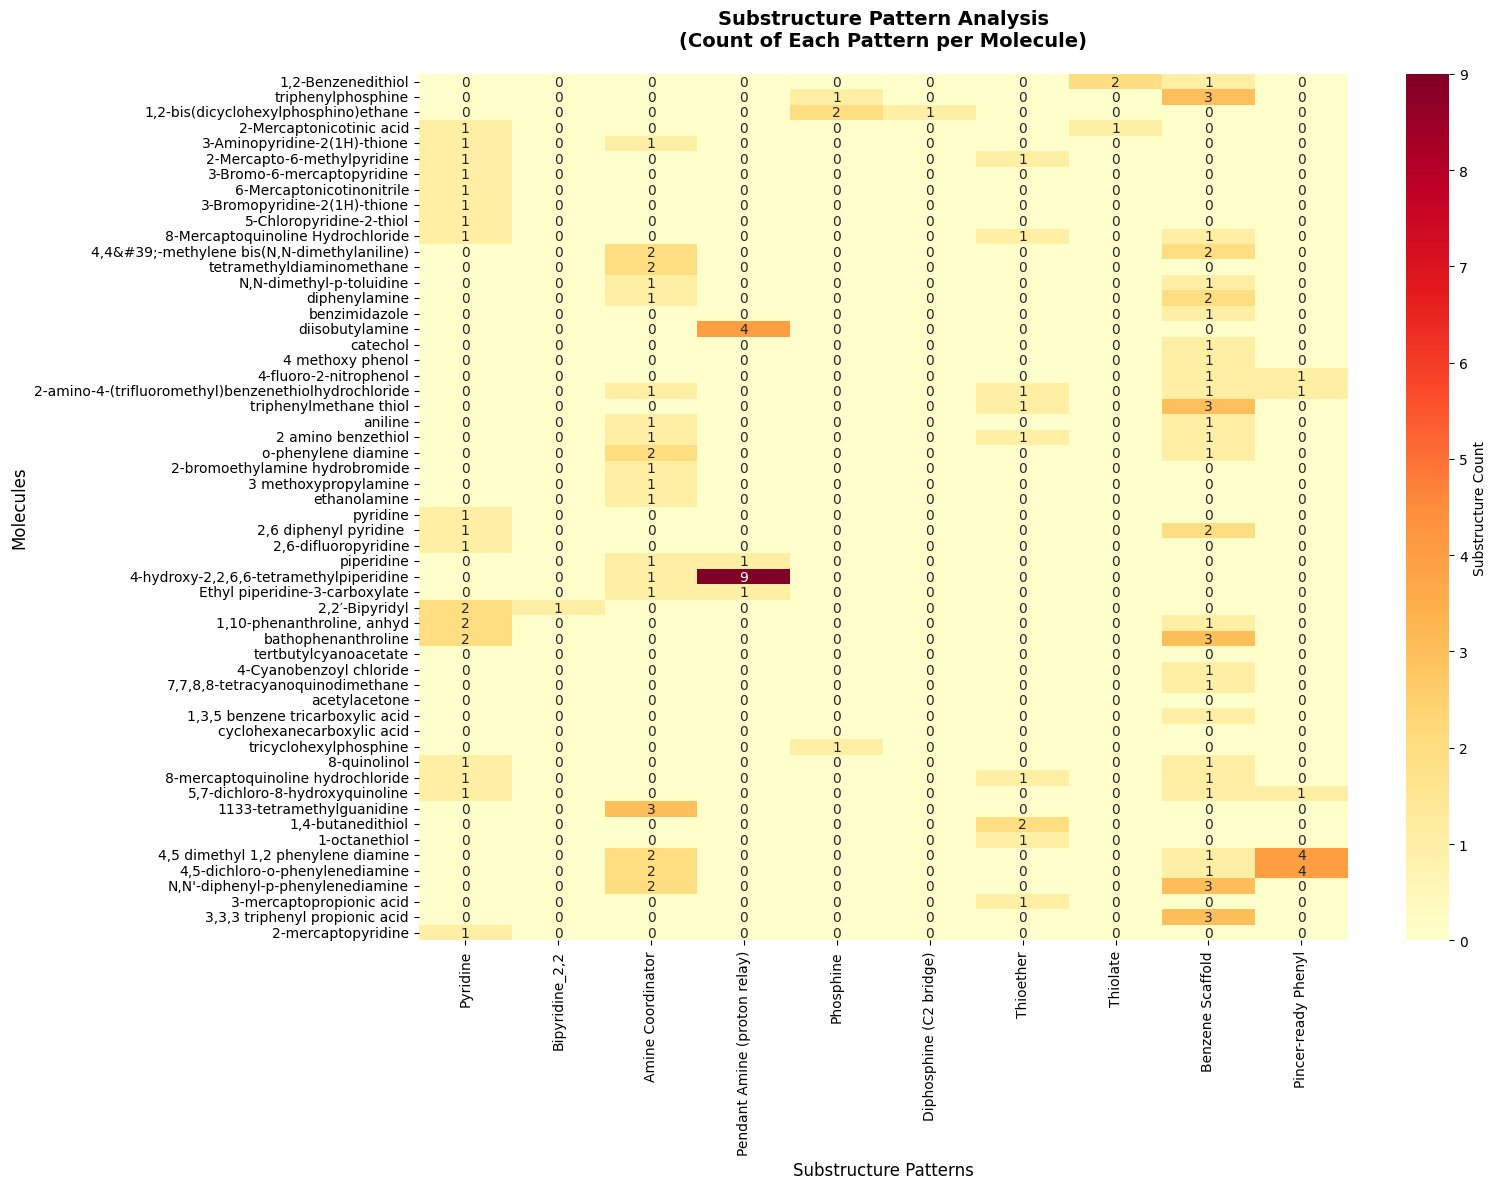

In [12]:
import seaborn as sns
# Create substructure heatmap
# Prepare data for heatmap (exclude molecule names)
heatmap_data = substructure_df.set_index('Molecule')

fig, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Substructure Count'},
            ax=ax)

ax.set_title('Substructure Pattern Analysis\n(Count of Each Pattern per Molecule)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Molecules', fontsize=12)
ax.set_xlabel('Substructure Patterns', fontsize=12)

plt.tight_layout()
plt.show()

---
### Economics and Scale Considerations

In [15]:
# Ligand prices
prices = [171.4, 33.2, 144, 58/25, 41, 120, 133/25, 55, 
          89.7, 161, 191, 40.4/5, 75/25, 155.91/1000, 55.8/5, 78.3/5,
          40.9/187.5, 42.55/250, 22.4/5, 34/5, 65.6/5, 49.6/5, 1.14/1000, 63.9/25,
          37.5/5, 43.8/25, 24.5/21.75, 53.1/25, 152/100, 185/(25/1000), 48.3/5, 44.7/4.31,
          87.3/10, 76.1, 23.6/2.5, 45.4/5, 114/0.5, 68.3, 27.8, 112/5,
          21/25, 1, 34.1/5, 75.9, 78.3/50, 157, 37.5/5, 52.8/.45,
          111/5, 44.4/21, 120/5, 124/5, 50.7/5, 52.2/5, 98.4/5, 45.3/5] # $/g
price_data = {i:j for i,j in zip(mol_names, prices)}

In [16]:
# Calculate economic metrics
economic_df = df.groupby('Ligand Name').first().reset_index()[['Ligand Name']]
economic_df['Prices ($/g)'] = economic_df['Ligand Name'].map(price_data)
economic_df['max h2 (umol)'] = df.groupby('Ligand Name')['max h2 (umol)'].max().reindex(economic_df['Ligand Name']).values
economic_df.head(10)

,Ligand Name,Prices ($/g),max h2 (umol)
0,"1,10-phenanthroline, anhyd",9.080000,0.459525
1,"1,2-Benzenedithiol",171.400000,0.706525
2,"1,2-bis(dicyclohexylphosphino)ethane",144.000000,0.390512
3,"1,3,5 benzene tricarboxylic acid",1.000000,0.822929
4,"1,4-butanedithiol",22.200000,9.647390
5,1-octanethiol,2.114286,18.832912
6,1133-tetramethylguanidine,117.333333,3.414655
7,2 amino benzethiol,2.556000,1.903188
8,"2,2′-Bipyridyl",9.440000,0.659100
9,"2,6 diphenyl pyridine",7400.000000,1.838881


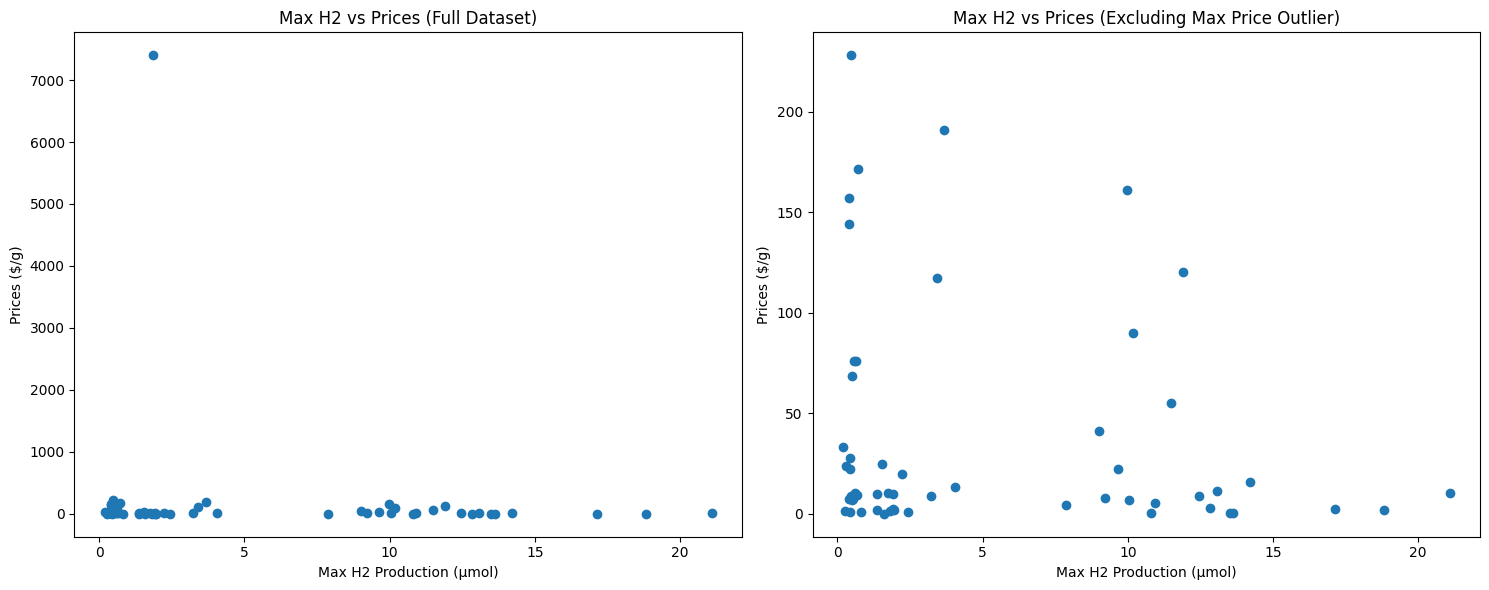

In [17]:
# Visualization: Max H2 vs Prices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Full dataset
axes[0].scatter(economic_df['max h2 (umol)'], 
                economic_df['Prices ($/g)'], 
                #c=economic_df['Scalability_Score'], 
                #cmap='viridis', s=100, alpha=0.7
                )
axes[0].set_xlabel('Max H2 Production (μmol)')
axes[0].set_ylabel('Prices ($/g)')
axes[0].set_title('Max H2 vs Prices (Full Dataset)')
#cbar1 = plt.colorbar(axes[0].collections[0], ax=axes[0])
#cbar1.set_label('Scalability Score')

# Exclude max price outlier
outlier_price = economic_df['Prices ($/g)'].max()
filtered_df = economic_df[economic_df['Prices ($/g)'] < outlier_price]
axes[1].scatter(filtered_df['max h2 (umol)'], 
                filtered_df['Prices ($/g)'])
axes[1].set_xlabel('Max H2 Production (μmol)')
axes[1].set_ylabel('Prices ($/g)')
axes[1].set_title('Max H2 vs Prices (Excluding Max Price Outlier)')
#cbar2 = plt.colorbar(axes[1].collections[0], ax=axes[1])
#cbar2.set_label('Scalability Score')

plt.tight_layout()
plt.show()